# Custom Chatbot Project

I have chosen the `nyc_food_scrap_drop_off_sites.csv` dataset, which contains information about food scrap drop-off sites in New York City. This dataset is suitable for customization with an LLM because it includes structured data about different locations, operating hours, and other relevant details which are assumed to be up-to-date . By embedding and indexing this information, we can enable an LLM to answer specific questions about food scrap drop-off locations, their hours of operation, and other relevant site details efficiently.


## Data Wrangling

TODO: In the cells below, load your chosen dataset into a `pandas` dataframe with a column named `"text"`. This column should contain all of your text data, separated into at least 20 rows.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import tiktoken
from openai import OpenAI

In [ ]:
# Environment variables
import openai

#OPENAI_API_KEY = 'YOUR_API_KEY'
OPENAI_API_KEY = 'YOUR_API_KEY'

In [3]:
# Load dataset
file_path = 'data/nyc_food_scrap_drop_off_sites.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,Unnamed: 0,borough,ntaname,food_scrap_drop_off_site,location,hosted_by,open_months,operation_day_hours,website,borocd,...,location_point,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,notes,ct2010,bbl,bin
0,0,Staten Island,Grasmere-Arrochar-South Beach-Dongan Hills,South Beach,"21 Robin Road, Staten Island NY",Snug Harbor Youth,Year Round,Friday (Start Time: 1:30 PM - End Time: 4:30 PM),snug-harbor.org,502,...,"{'type': 'Point', 'coordinates': [-74.062991, ...",1.0,14.0,76.0,10692.0,30.0,NaN,NaN,NaN,NaN
1,1,Manhattan,Inwood,SE Corner of Broadway & Academy Street,NaN,Department of Sanitation,Year Round,24/7,www.nyc.gov/smartcomposting,112,...,NaN,NaN,NaN,NaN,NaN,NaN,Download the app to access bins. Accepts all f...,NaN,NaN,NaN
2,2,Brooklyn,Park Slope,Old Stone House Brooklyn,"336 3rd St, Brooklyn, NY 11215",Old Stone House Brooklyn,Year Round,24/7 (Start Time: 24/7 - End Time: 24/7),NaN,306,...,"{'type': 'Point', 'coordinates': [-73.984731, ...",2.0,27.0,50.0,17617.0,14.0,NaN,NaN,NaN,NaN
3,3,Manhattan,East Harlem (North),SE Corner of Pleasant Avenue & E 116 Street,NaN,Department of Sanitation,Year Round,24/7,www.nyc.gov/smartcomposting,111,...,NaN,NaN,NaN,NaN,NaN,NaN,Download the app to access bins. Accepts all f...,NaN,NaN,NaN
4,4,Queens,Corona,Malcolm X FSDO,"111-26 Northern Blvd, Flushing, NY 11368",NYC Compost Project Hosted by Big Reuse,Year Round,Tuesdays (Start Time: 12:00 PM - End Time: 2:...,NaN,404,...,"{'type': 'Point', 'coordinates': [-73.8630721,...",3.0,21.0,68.0,14510.0,66.0,NaN,NaN,NaN,NaN


In [5]:
# Select relevant columns and create a "text" column
selected_columns = ["borough", "ntaname", "food_scrap_drop_off_site", "location", "hosted_by", "open_months", "operation_day_hours"]
df = df[selected_columns]

def format_text(row):
    return (
        f"District: {row['borough']}. "
        f"Neighborhood: {row['ntaname']}. "
        f"Drop-off Site: {row['food_scrap_drop_off_site']}. "
        f"Address: {row['location']}. "
        f"Hosted By: {row['hosted_by']}. "
        f"Open Months: {row['open_months']}. "
        f"Operation Day Hours: {row['operation_day_hours']}"
    )

df["text"] = df.apply(format_text, axis=1)


In [6]:
#drop all columns except text
df = df[["text"]]

In [7]:
df.head()

,text
0,District: Staten Island. Neighborhood: Grasmer...
1,District: Manhattan. Neighborhood: Inwood. Dro...
2,District: Brooklyn. Neighborhood: Park Slope. ...
3,District: Manhattan. Neighborhood: East Harlem...
4,District: Queens. Neighborhood: Corona. Drop-o...


In [8]:
EMBEDDING_MODEL = 'text-embedding-3-small'
COMPLETION_MODEL = 'gpt-3.5-turbo'
MAX_TOKENS = 1024  # Parameter to limit maximum token size
# Initialize OpenAI Client

client = OpenAI(
    base_url = "https://openai.vocareum.com/v1",
    api_key = OPENAI_API_KEY
)

In [9]:
# Function to generate embeddings
def get_embeddings(text, model=EMBEDDING_MODEL):
    response = client.embeddings.create(
        model=model,
        input=[text]
    )
    return response.data[0].embedding

In [13]:
# Add embeddings to DataFrame
df["embedding"] = df["text"].apply(lambda x: get_embeddings(x))

In [14]:
df.head()

,text,embedding
0,District: Staten Island. Neighborhood: Grasmer...,"[-0.04354222118854523, -0.030399683862924576, ..."
1,District: Manhattan. Neighborhood: Inwood. Dro...,"[-0.031039925292134285, -0.02552143484354019, ..."
2,District: Brooklyn. Neighborhood: Park Slope. ...,"[-0.017346501350402832, -0.03575720638036728, ..."
3,District: Manhattan. Neighborhood: East Harlem...,"[-0.018853355199098587, -0.021509796380996704,..."
4,District: Queens. Neighborhood: Corona. Drop-o...,"[-0.024035673588514328, -0.014160173945128918,..."


In [15]:
# Define questions
questions = [
    "Where can I drop off food scraps in Queens, Astoria on Monday?",
    "What are the hours of operation for food scrap drop-off location at Maggie's Magic Garden in Manhattan?"
]

In [16]:
# Function to compute cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

In [17]:
# Compute similarity scores
def get_most_similar_context(question, df):
    question_embedding = get_embeddings(question)
    df["similarity"] = df["embedding"].apply(lambda x: cosine_similarity(question_embedding, x))
    return df.sort_values("similarity", ascending=False)



In [18]:
# Add similarity scores to DataFrame
df["q1_similarity"] = df["embedding"].apply(lambda x: cosine_similarity(get_embeddings(questions[0]), x))
df["q2_similarity"] = df["embedding"].apply(lambda x: cosine_similarity(get_embeddings(questions[1]), x))

In [19]:
df.head()

,text,embedding,q1_similarity,q2_similarity
0,District: Staten Island. Neighborhood: Grasmer...,"[-0.04354222118854523, -0.030399683862924576, ...",0.466751,0.470491
1,District: Manhattan. Neighborhood: Inwood. Dro...,"[-0.031039925292134285, -0.02552143484354019, ...",0.574344,0.534520
2,District: Brooklyn. Neighborhood: Park Slope. ...,"[-0.017346501350402832, -0.03575720638036728, ...",0.486889,0.456158
3,District: Manhattan. Neighborhood: East Harlem...,"[-0.018853355199098587, -0.021509796380996704,...",0.578542,0.572399
4,District: Queens. Neighborhood: Corona. Drop-o...,"[-0.024035673588514328, -0.014160173945128918,...",0.669496,0.507913


In [20]:
df.sort_values("q1_similarity", ascending=False).head()

,text,embedding,q1_similarity,q2_similarity
73,District: Queens. Neighborhood: Astoria (Centr...,"[-0.01626589708030224, -0.02935090847313404, 0...",0.740035,0.533419
340,District: Queens. Neighborhood: Astoria (Centr...,"[-0.027998557314276695, -0.029488882049918175,...",0.735256,0.529860
224,District: Queens. Neighborhood: Astoria (Centr...,"[-0.026699451729655266, -0.028611741960048676,...",0.732745,0.534050
191,District: Queens. Neighborhood: Astoria (Centr...,"[-0.024547377601265907, -0.028699669986963272,...",0.732462,0.529949
148,District: Queens. Neighborhood: Astoria (Centr...,"[-0.023935502395033836, -0.02801968716084957, ...",0.731926,0.532868


In [21]:
df.sort_values("q2_similarity", ascending=False).head()

,text,embedding,q1_similarity,q2_similarity
444,District: Manhattan. Neighborhood: Hamilton He...,"[-0.012295011430978775, -0.04007171094417572, ...",0.471015,0.739306
121,District: Manhattan. Neighborhood: East Harlem...,"[-0.004335145931690931, -0.03613698109984398, ...",0.455026,0.727634
165,District: Manhattan. Neighborhood: Midtown Sou...,"[-0.029151948168873787, -0.03979134559631348, ...",0.641776,0.670170
116,District: Manhattan. Neighborhood: Upper East ...,"[-0.023982951417565346, -0.01543155312538147, ...",0.670466,0.657147
550,District: Manhattan. Neighborhood: Upper East ...,"[-0.03148358687758446, -0.029784396290779114, ...",0.635455,0.645556


In [22]:
# Save embeddings to CSV
df.to_csv("data/nyc_food_scrap_embeddings.csv", index=False)

## Custom Query Completion

TODO: In the cells below, compose a custom query using your chosen dataset and retrieve results from an OpenAI `Completion` model. You may copy and paste any useful code from the course materials.

In [23]:
# Function to tokenize text and count tokens
def count_tokens(text):
    encoding = tiktoken.get_encoding("cl100k_base")
    return len(encoding.encode(text))

In [24]:
# Function to generate response from LLM
def get_response(prompt, model=COMPLETION_MODEL):
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "system", "content": "You are a helpful assistant that answers questions about NYC food scrap drop-off sites. If you don't know the answer, you can say 'I dont know'. 24/7 means everyday, all day."},
                  {"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content

In [25]:
# Function to build a simple prompt
def build_simple_prompt(question):
    return f"Answer the following question: {question}"

In [26]:
# Function to build a custom context
MAX_TOKENS=1024
def build_custom_context(question, df, max_tokens=MAX_TOKENS):
    relevant_texts = []
    token_count = 0
    for _, row in get_most_similar_context(question, df).iterrows():
        text = row["text"]
        text_tokens = len(text.split())
        if token_count + text_tokens <= max_tokens:
            relevant_texts.append(text)
            token_count += text_tokens
        else:
            break
    return "\n".join(relevant_texts)

In [28]:
build_custom_context(questions[0], df, max_tokens=MAX_TOKENS)


'District: Queens. Neighborhood: Astoria (Central). Drop-off Site: S/E Corner of\xa038\xa0St\xa0& 31\xa0Avenue, on\xa038\xa0St. Address: S/E Corner of\xa038\xa0St\xa0& 31\xa0Avenue, on\xa038\xa0St. Hosted By: Department of Sanitation. Open Months: Year Round. Operation Day Hours: 24/8\nDistrict: Queens. Neighborhood: Astoria (Central). Drop-off Site: N/W corner of 31 ave and 35 st. Address: N/W corner of 31 ave and 35 st. Hosted By: Department of Sanitation. Open Months: Year Round. Operation Day Hours: 24/7\nDistrict: Queens. Neighborhood: Astoria (Central). Drop-off Site: N/W Corner of 31 Ave and 29 St. Address: N/W Corner of 31 Ave and 29 St. Hosted By: Department of Sanitation. Open Months: Year Round. Operation Day Hours: 24/7\nDistrict: Queens. Neighborhood: Astoria (Central). Drop-off Site: S/E Corner of 31 Ave and 35 St. Address: S/E Corner of 31 Ave and 35 St. Hosted By: Department of Sanitation. Open Months: Year Round. Operation Day Hours: 24/7\nDistrict: Queens. Neighborhoo

In [29]:
build_custom_context(questions[1], df, max_tokens=MAX_TOKENS)

"District: Manhattan. Neighborhood: Hamilton Heights-Sugar Hill. Drop-off Site: Maggie's Garden. Address: 564 W 149th St. Hosted By: Maggie's Garden. Open Months: Year Round. Operation Day Hours: 24/7 (Start Time: 24/7 - End Time:  24/7)\nDistrict: Manhattan. Neighborhood: East Harlem (South). Drop-off Site: Maggie's Magic Garden. Address: 1574 Lexington Ave, New York, NY 10029. Hosted By: Maggie's Magic Garden. Open Months: Year Round. Operation Day Hours: Every day (Start Time: Dawn - End Time:  Dusk)\nDistrict: Manhattan. Neighborhood: Midtown South-Flatiron-Union Square. Drop-off Site: Madison Square Park Food Scrap Drop-off. Address: 23rd St & Broadway. Hosted By: GrowNYC. Open Months: Year Round. Operation Day Hours: Wednesdays (Start Time: 8:00 AM - End Time:  1:00 PM)\nDistrict: Manhattan. Neighborhood: Upper East Side-Yorkville. Drop-off Site: Asphalt Green Food Scrap Drop-off. Address: East 91st St & York Ave. Hosted By: GrowNYC. Open Months: Year Round. Operation Day Hours: 

In [30]:
# Function to build a custom prompt
def build_custom_prompt(question, df, max_tokens=MAX_TOKENS):
    context = build_custom_context(question, df, max_tokens)
    return f"Using the following data, answer the question:\n{context}\n\nQuestion: {question}"

## Custom Performance Demonstration

TODO: In the cells below, demonstrate the performance of your custom query using at least 2 questions. For each question, show the answer from a basic `Completion` model query as well as the answer from your custom query.

In [31]:
# Function to handle a question and return both simple and custom responses
def handle_question(question, df):
    simple_prompt = build_simple_prompt(question)
    custom_prompt = build_custom_prompt(question, df)
    
    simple_answer = get_response(simple_prompt)
    custom_answer = get_response(custom_prompt)
    
    print(f"Question: {question}\n")
    print(f"Simple Model Answer:\n{simple_answer}\n")
    print(f"Custom Model Answer:\n{custom_answer}\n")

### Question 1

In [32]:
handle_question(questions[0], df)

Question: Where can I drop off food scraps in Queens, Astoria on Monday?

Simple Model Answer:
You can drop off food scraps in Queens, Astoria on Monday at the Socrates Sculpture Park Food Scrap Drop-Off site.

Custom Model Answer:
You can drop off food scraps in Queens, Astoria at the following locations on Monday:

1. N/W corner of 31 ave and 35 st.
2. N/W Corner of 31 Ave and 29 St.
3. N/W Corner of 31 Ave and 37 St.
4. 32 St between 31 Ave and 30 Ave.

These drop-off sites are open 24/7, so you can visit them anytime on Monday to drop off your food scraps.



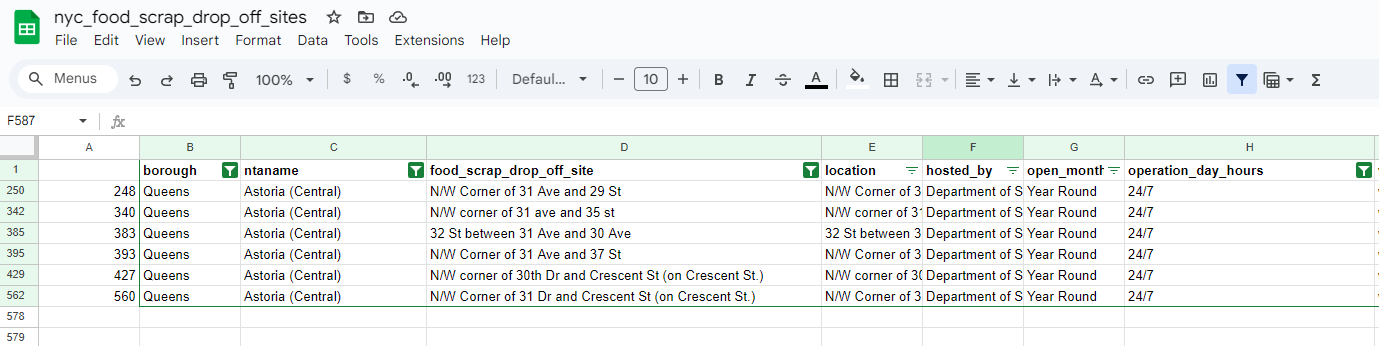

In [34]:
from IPython.display import Image
Image(filename="data/queens.png")

### Question 2

In [33]:
handle_question(questions[1], df)

Question: What are the hours of operation for food scrap drop-off location at Maggie's Magic Garden in Manhattan?

Simple Model Answer:
The food scrap drop-off site at Maggie's Magic Garden in Manhattan is open 24/7.

Custom Model Answer:
The hours of operation for the food scrap drop-off location at Maggie's Magic Garden in Manhattan are every day from Dawn to Dusk.



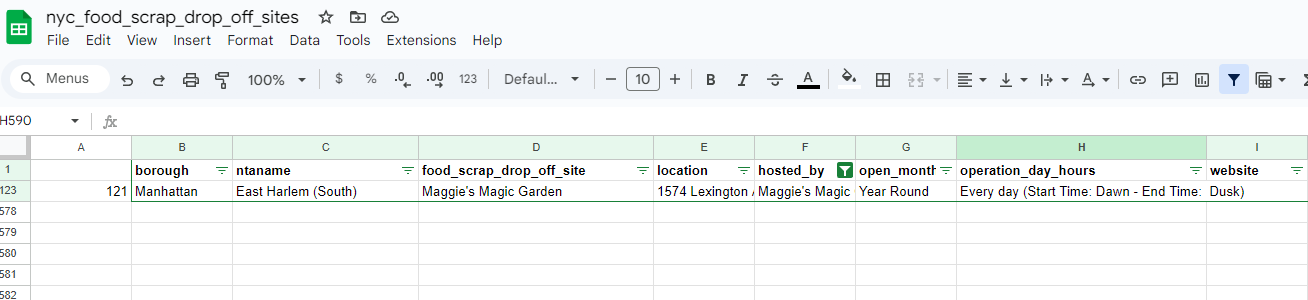

In [35]:
from IPython.display import Image
Image(filename="data/manhattan.png")